# Notebook #4: Estandización

In [1]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import pickle

# Feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../../../")
from src import soporte_scaling as ss

- Como primer paso, cargaremos los datos.

In [2]:
df = pd.read_pickle('../../../../datos/cluster1/modelo1/df_sinoutliers.pkl')
df.head()

,Profit,Ship Mode,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Order Priority
0,-96.540,18.144652104256338,34.557164967225056,25.847096410178732,21.591716298157454,62.629773641488164,62.04430696864112,5,0.1,19.484121913096885
1,83.281,19.35945023323146,21.648691224655312,21.648691224655312,16.23160015044892,15.716697078215004,9.696874878156846,5,0.0,18.94461962831689
2,119.280,22.22066194331984,28.292753521126762,16.72019706943336,25.18477097203728,62.629773641488164,62.04430696864112,4,0.0,33.47044804185351
3,130.080,18.144652104256338,26.433209875107778,6.122667667367157,6.122667667367157,38.09423667439165,3.3507218103527014,4,0.0,33.47044804185351
4,121.940,18.144652104256338,37.03574271099744,16.72019706943336,21.591716298157454,15.716697078215004,70.53398103225807,13,0.0,19.484121913096885


- Aplicamos el formato numérico a todas nuestras columnas, dado que queremos estandarizar todo el dataframe, y creamos una variable que almacene esas features a estandarizar.

In [3]:
df = df.astype(float)
columnas_scaling = ['Ship Mode', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Quantity', 'Discount', 'Order Priority']

- Y aplicamos los 4 escaladores con los que contamos:

In [4]:
df_escaladores_graf = ss.aplicar_escaladores(df, columnas_scaling, 'Profit', [RobustScaler(), MinMaxScaler(), StandardScaler(), Normalizer()])

In [5]:
df_escaladores_graf.head(5)

,Profit,Ship Mode,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Order Priority,Ship Mode_robust,Country_robust,Market_robust,Region_robust,Category_robust,Sub-Category_robust,Quantity_robust,Discount_robust,Order Priority_robust,Ship Mode_minmax,Country_minmax,Market_minmax,Region_minmax,Category_minmax,Sub-Category_minmax,Quantity_minmax,Discount_minmax,Order Priority_minmax,Ship Mode_standard,Country_standard,Market_standard,Region_standard,Category_standard,Sub-Category_standard,Quantity_standard,Discount_standard,Order Priority_standard,Ship Mode_normalizer,Country_normalizer,Market_normalizer,Region_normalizer,Category_normalizer,Sub-Category_normalizer,Quantity_normalizer,Discount_normalizer,Order Priority_normalizer
0,-96.540,18.144652,34.557165,25.847096,21.591716,62.629774,62.044307,5.0,0.1,19.484122,-6.004496,0.908852,0.801325,0.000000,46.913077,4.297552,0.666667,0.5,0.000000,0.000000,0.809585,0.768536,0.525770,1.000,0.643882,0.307692,0.125,0.134541,-1.751258,0.671424,1.101716,0.245058,3.801277,2.290159,0.731094,-0.165847,0.000244,0.174320,0.331999,0.248319,0.207437,0.601700,0.596075,0.048036,0.000961,0.187189
1,83.281,19.359450,21.648691,21.648691,16.231600,15.716697,9.696875,5.0,0.0,18.944620,-1.000000,0.000000,0.000000,-0.581278,0.000000,-0.181469,0.666667,0.0,-1.000000,0.298036,0.695765,0.604951,0.374099,0.000,0.069619,0.307692,0.000,0.101157,-0.165751,0.092357,0.374442,-0.381683,-0.321076,-0.506996,0.731094,-0.634593,-0.258539,0.403626,0.451355,0.451355,0.338413,0.327678,0.202171,0.104245,0.000000,0.394977
2,119.280,22.220662,28.292754,16.720197,25.184771,62.629774,62.044307,4.0,0.0,33.470448,10.787081,0.467791,-0.940673,0.389649,46.913077,4.297552,0.333333,0.0,25.924498,1.000000,0.754349,0.412919,0.627440,1.000,0.643882,0.230769,0.000,1.000000,3.568593,0.390406,-0.479303,0.665182,3.801277,2.290159,0.274189,-0.634593,6.709071,0.210754,0.268346,0.158584,0.238868,0.594019,0.588466,0.037938,0.000000,0.317454
3,130.080,18.144652,26.433210,6.122668,6.122668,38.094237,3.350722,4.0,0.0,33.470448,-6.004496,0.336865,-2.963362,-1.677541,22.377540,-0.724467,0.333333,0.0,25.924498,0.000000,0.737952,0.000000,0.088055,0.477,0.000000,0.230769,0.000,1.000000,-1.751258,0.306988,-2.315074,-1.563687,1.645287,-0.846099,0.274189,-0.634593,6.709071,0.298232,0.434466,0.100634,0.100634,0.626131,0.055074,0.065746,0.000000,0.550133
4,121.940,18.144652,37.035743,16.720197,21.591716,15.716697,70.533981,13.0,0.0,19.484122,-6.004496,1.083362,-0.940673,0.000000,0.000000,5.023957,3.333333,0.0,0.000000,0.000000,0.831440,0.412919,0.525770,0.000,0.737016,0.923077,0.000,0.134541,-1.751258,0.782612,-0.479303,0.245058,-0.321076,2.743800,4.386334,-0.634593,0.000244,0.200163,0.408560,0.184449,0.238189,0.173379,0.778096,0.143410,0.000000,0.214939


- Los representamos visualmente:

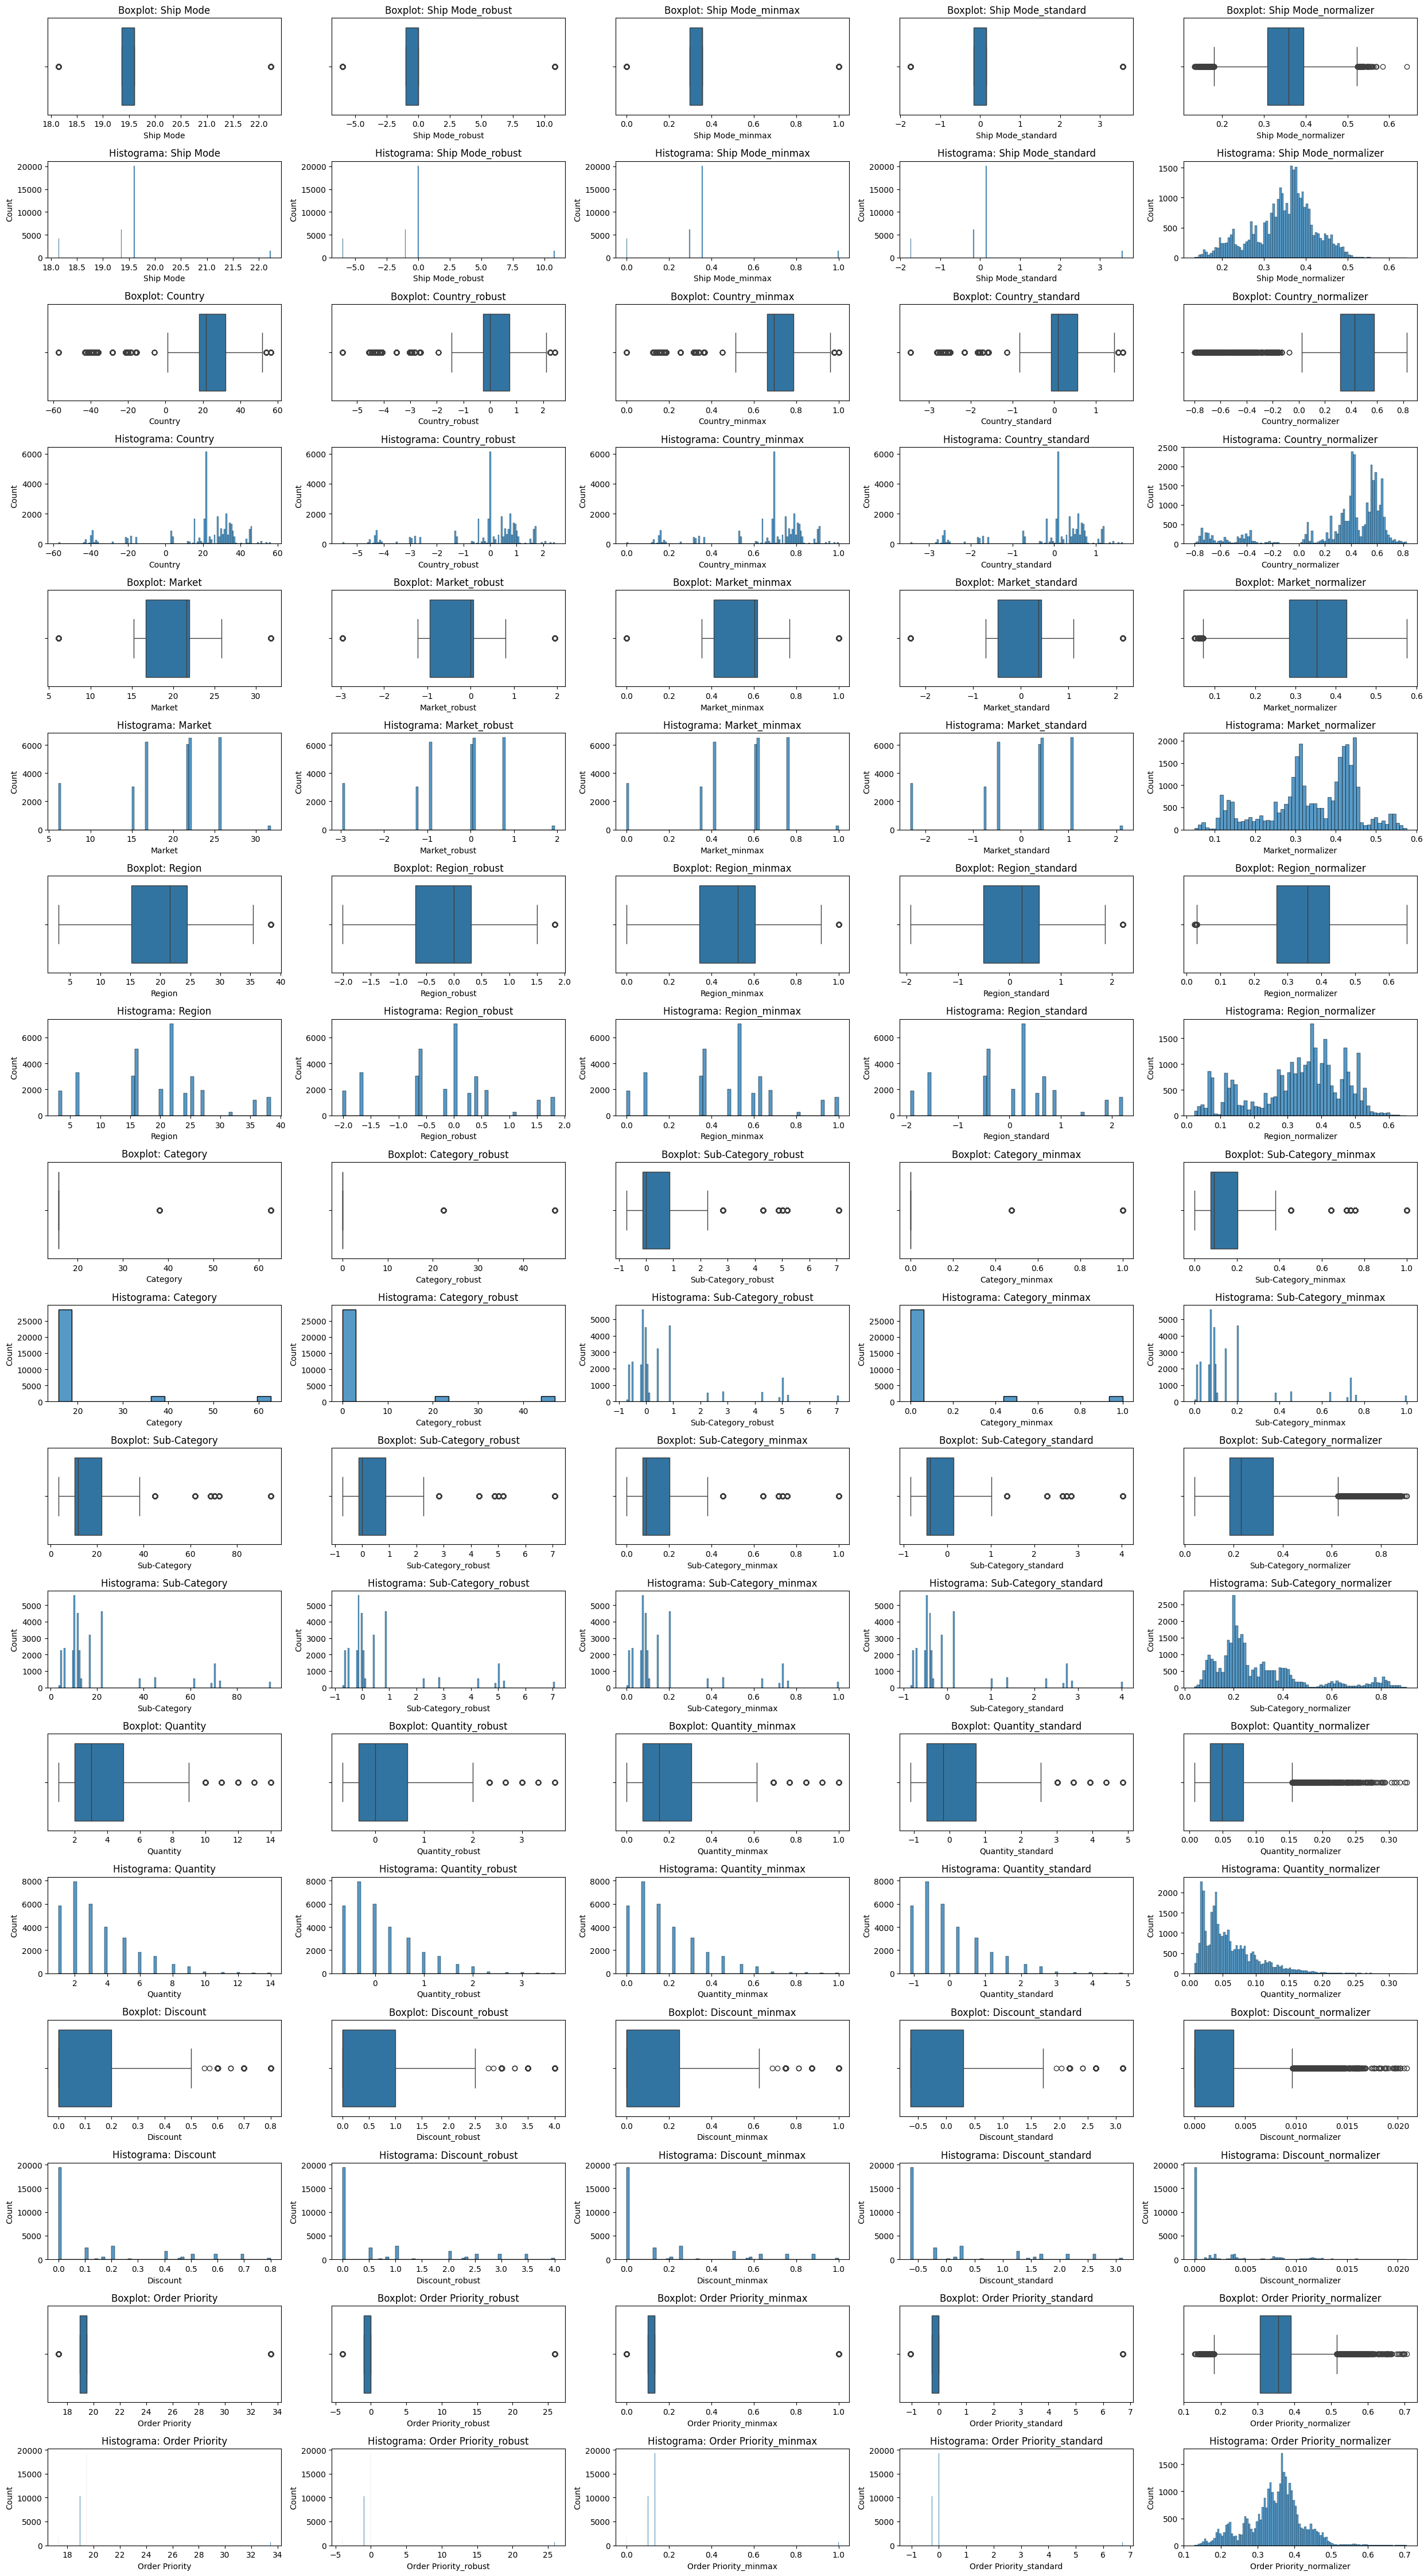

In [6]:
ss.graficar_escaladores(df_escaladores_graf, columnas_scaling, df_escaladores_graf.filter(like="_").columns)

- Nos quedaremos con el Standard Scaler, dado que, en las gráficas, cuando comparamos con los datos sin escalar, no se observan grandes diferencias entre el Robust, MinMax y el Standard (sabemos que por la naturaleza del Normalizer, tenemos resultados distintos), y lo que interesa en este caso es minimizar -"suavizar"- las diferencias.

In [7]:
df_standard, scaler = ss.aplicar_escaladores(df, columnas_scaling, 'Profit', [StandardScaler()], return_scaler= True)
df_standard.head(1)

,Profit,Ship Mode,Country,Market,Region,Category,Sub-Category,Quantity,Discount,Order Priority
0,-96.54,-1.751258,0.671424,1.101716,0.245058,3.801277,2.290159,0.731094,-0.165847,0.000244


- Finalmente, guardamos el dataframe estandarizado, al que aplicaremos los modelos predictivos. Guardamos también el objeto del escalador.

In [8]:
with open('../../../../datos/cluster1/modelo1/df_scaled', 'wb') as f:
    pickle.dump(df_standard, f)

In [9]:
with open('../../../../transformers/cluster1_scaler.pkl', 'wb') as f:
     pickle.dump(scaler, f)